In [2]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time
# Import scipy to get sparse arrays
import scipy
from scipy import sparse
from scipy.sparse import linalg

In [3]:
# We apply these for both x and y
Xmin = 0
Xmax = 1
Nx   = 100
# Set up x using Xmin, Xmax, Nx, and calculate dx
# Alternative would be to calculate dx, and use that
# to set up x. Just make sure that they are consistent.
x    = np.linspace(Xmin, Xmax, Nx)
dx   = x[1] - x[0]

# How long to integrate in time
Tmax = 2
dt   = 0.005

# Prefactor
C = dt**2 / dx**2
print('C = ', C)

# Dimension 3 to hold previous, current and next timestep
U = np.zeros((3, Nx + 2, Nx + 2)) # Adding ghost cells

C =  0.245025


In [4]:
# Setup, initial values and current value

#Initial
X, Y   = np.meshgrid(x, x)
U[0,1:Nx+1,1:Nx+1] = np.sin(np.pi*X)*np.sin(2*np.pi*Y)

# Current (using special stencil for first step)
# (for loop formulation)
for i in range(1, Nx+1):
    for j in range(1, Nx+1):
        U[1,i,j] = U[0,i,j] + \
            0.5*C*(U[0,i+1,j] + U[0,i+1,j] + U[0,i+1,j] + U[0,i+1,j] - 4*U[0,i+1,j]) 



In [5]:
# Now we are ready to proceed with the regular time loop

# This implementation uses for loops,
# this is conceptually easier, but much less efficient
# than using array operations (see below)
t = 0
tic = time()
while t < Tmax:
    t += dt
    # Calculate next step, then copy:
    # current -> previous
    # next -> current
    for i in range(1, Nx+1):
        for j in range(1, Nx+1):
            U[2,i,j] = 2*U[1,i,j] - U[0,i,j] + \
                C*(U[1,i+1,j] + U[1,i-1,j] + U[1,i,j+1] + U[1,i,j-1] - 4*U[1,i,j]) 
    
    U[0,:,:] = U[1,:,:]
    U[1,:,:] = U[2,:,:]
toc = time()
print('The calculation took %s seconds' % (toc - tic))

The calculation took 12.725375890731812 seconds


In [9]:
# Now we are ready to proceed with the regular time loop

# This implementation uses array operations with
# offset indexing, to do the same thing as the double
# for loop above in one expression. This is much more efficient.
t = 0
tic = time()
while t < Tmax:
    t += dt
    # Calculate next step, then copy:
    # current -> previous
    # next -> current
    U[2, 1:Nx+1, 1:Nx+1] = \
        2*U[1, 1:Nx+1, 1:Nx+1] - U[0, 1:Nx+1, 1:Nx+1] + \
        C*( 
                U[1,2:,1:Nx+1] + U[1,:Nx,1:Nx+1] 
            +   U[1,1:Nx+1,2:] + U[1,1:Nx+1,:Nx]
            - 4*U[1,1:Nx+1,1:Nx+1]
        )
    
    U[0,:,:] = U[1,:,:]
    U[1,:,:] = U[2,:,:]
toc = time()
print('The calculation took %s seconds' % (toc - tic))

The calculation took 0.07838010787963867 seconds


/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


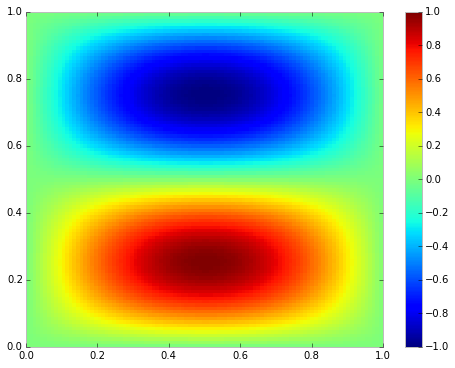

In [5]:
# Plotting as heatmap
fig = plt.figure(figsize = (8,6))
mesh = plt.pcolormesh(X, Y, U[1, 1:Nx+1, 1:Nx+1])
plt.colorbar(mesh)

/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


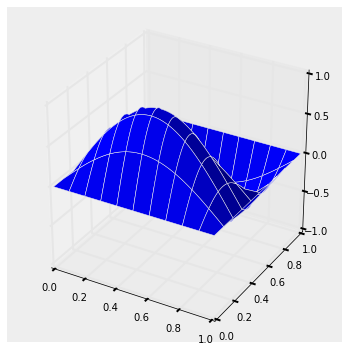

In [6]:
# Plotting as 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,6))
ax  = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, U[1, 1:Nx+1, 1:Nx+1])

/Users/nordam/.virtualenvs/default/lib/python3.4/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


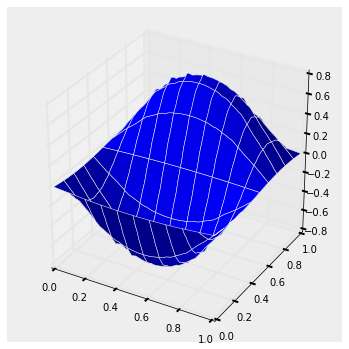

In [10]:
# Plotting as 3D surface plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,6))
ax  = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, U[1, 1:Nx+1, 1:Nx+1])

In [12]:
13/0.07


185.7142857142857